In [86]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

In [44]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [54]:
prod = pd.read_csv('DEFECT2.csv')
prod.columns = ['year','Defect','Sold','Produced','Advertisment']
prod.head()

,year,Defect,Sold,Produced,Advertisment
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


# Now that we have the data uploaded we need to make sure the variables are continuous and numeric variables and that there is a linear relationship between the predictors and predictant 

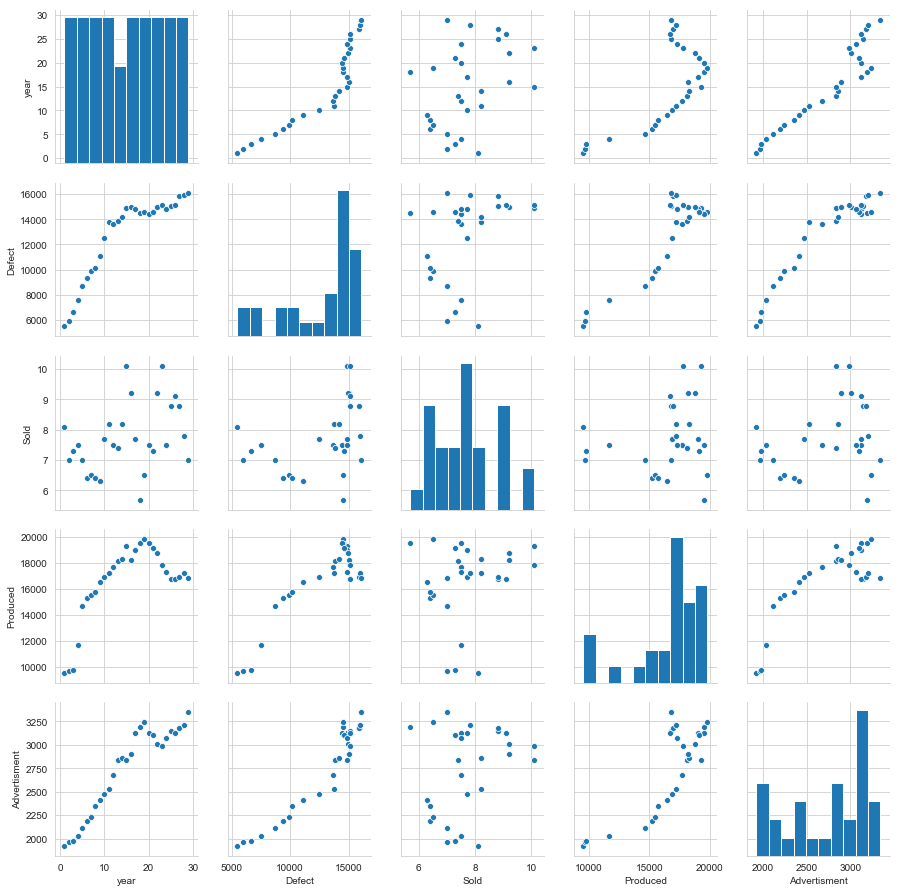

In [55]:
sb.pairplot(prod)

# Here we are can see that the relationship between sold and the amount defects could be more linear but we will see how amount amount sold affects defects anyway. It seems to be our variables are continuous numeric so were good to go. The produced to defect linearity is clear.

# Now we will check the correlation we dont want correlation between predictor variables 

In [56]:
prod.corr()
# Here we use the correlation matrix to see the r value of the sold/produced variable pair
# Here we can see the correlation for the pair has almost no correlation whatsoever 

,year,Defect,Sold,Produced,Advertisment
year,1.000000,0.900934,0.378305,0.670300,0.944287
Defect,0.900934,1.000000,0.391344,0.890294,0.949876
Sold,0.378305,0.391344,1.000000,0.177376,0.282310
Produced,0.670300,0.890294,0.177376,1.000000,0.820089
Advertisment,0.944287,0.949876,0.282310,0.820089,1.000000


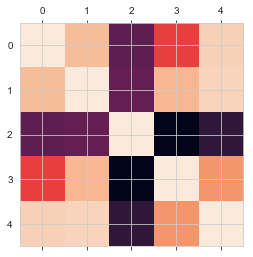

In [57]:
plt.matshow(prod.corr())
# here we visualize the problem
# Black represents no correlation 

C:\Users\blake\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


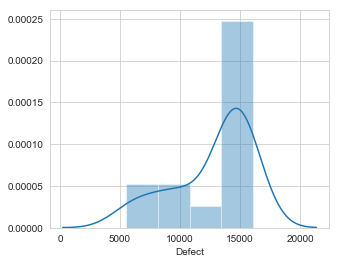

In [81]:
sns.distplot(prod['Defect'])

In [115]:
reg = LinearRegression()
reg.fit(prod[['Sold','Produced']],prod.Defect)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [116]:
reg.coef_
# in y=mx +b these are the m
# sold and produced are the x and y is defects 

array([698.26813163,   0.94227685])

In [117]:
reg.intercept_ 
# this is b in y=mx + b

-8255.751059116106

# Lets perdict how many defects might occur from 7.0% product sold and 9731 product produced. (Assume Sold column is in percent)

In [118]:
reg.predict([[7.0,9731]])
# if you go back up to the original data you can see that this fits into a realistic prediciton!

array([5801.42193473])

In [119]:
# this is how the cel above predicted the outcome!
698.268*7.0+ .94227*9731+ -8255.7510

5801.354370000001

In [144]:
from sklearn.linear_model import LinearRegression

In [145]:
model = LinearRegression()

In [146]:
X, y = prod[['Sold','Produced']], prod.Defect

In [147]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [148]:
model.score(X,y)
# This is the R squared of the regression
#This shows us how well the model works from 0 to 1 
# a .84 is pretty good but it definatly can improve 
# this is an unconventional prediction as products sold would not likely have an effect on defects in produciton although amount produced might


0.8488812666133724

# If we need to check for missing values  using filtering with an object missing_values to give all boolean values to return if a value in x data frame is missing. This will return a true or false value to see if value is missing.

In [110]:
missing_values = X==np.NAN
X[missing_values == True]
# it shows we are all good here!

array([], dtype=float64)

# Now we instantiate a linear regression object. We call linear regression funciton and passing in a parameter normalize equal to true.  This normalizes variables before regression. To get values measured on different scales to common scale. 